In [1]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizationsf
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)

In [2]:

data=pd.read_csv("data.csv")


In [3]:
data.shape

(569, 33)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# removing the last column as it is empty

data = data.drop([ 'Unnamed: 32'], axis = 1)

print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# checking if there is any null values in the data

data.isnull().sum().sum()

0

## Data Visualization

In [8]:
# checking the different values contained in the diagnosis column

diagnosis = data['diagnosis'].value_counts()

diagnosis_label = diagnosis.index
diagnosis_size = diagnosis.values

colors = ['pink', 'lightgreen']

trace = go.Pie(labels = diagnosis_label,
              values = diagnosis_size,
               marker = dict(colors = colors),
               name = 'Breast Cancer',
               hole = 0.3
              )
df = [trace]
layout = go.Layout(title = 'Distribution of Patients')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)


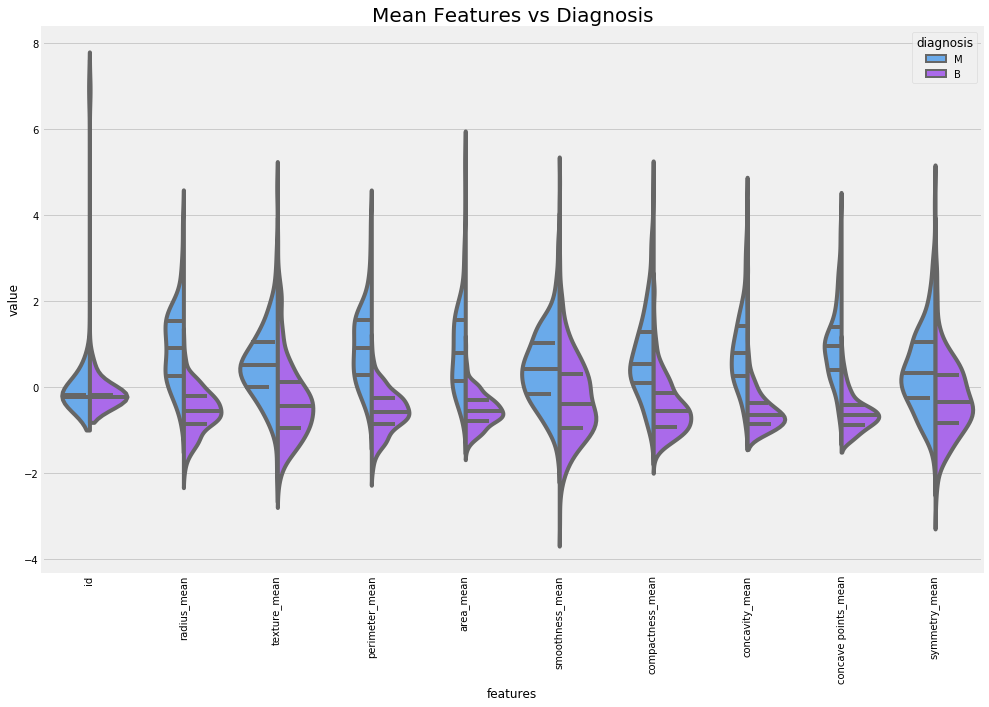

In [9]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,0:10]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=df,split=True, inner="quart", palette = 'cool')
plt.title('Mean Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()


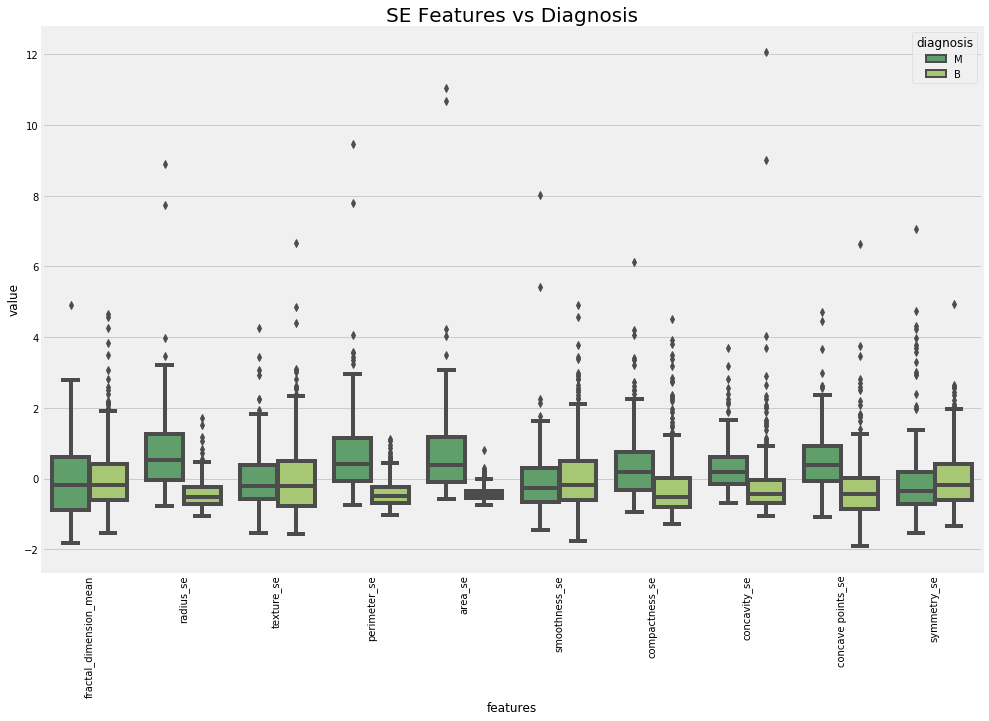

In [10]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,10:20]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'summer')
plt.title('SE Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()


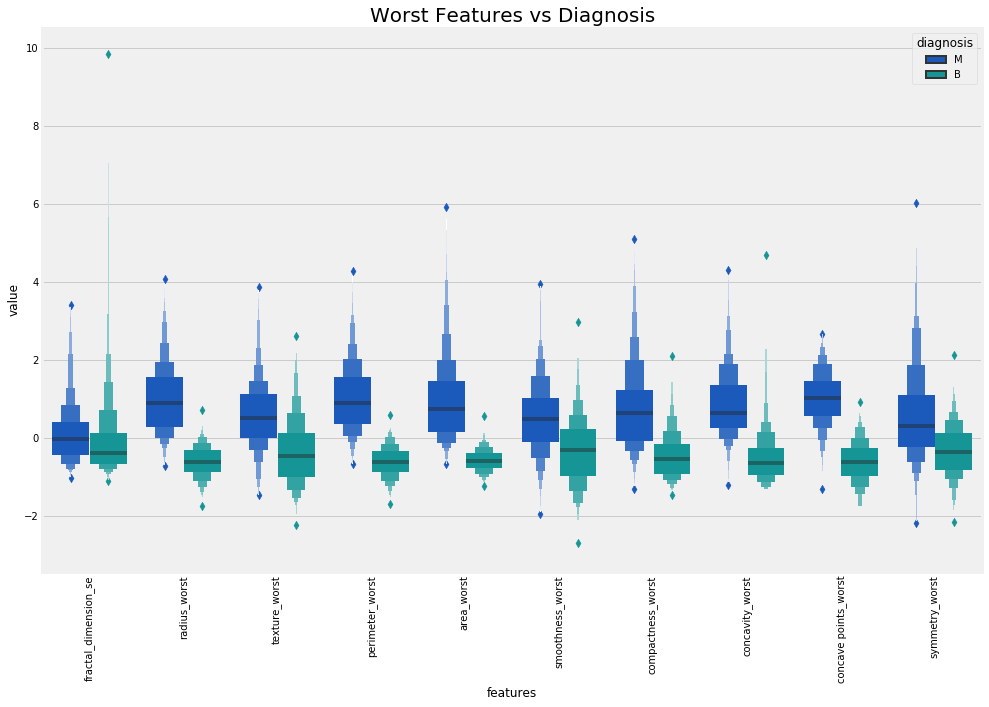

In [11]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,20:30]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxenplot(x="features", y="value", hue="diagnosis", data=df, palette = 'winter')
plt.title('Worst Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

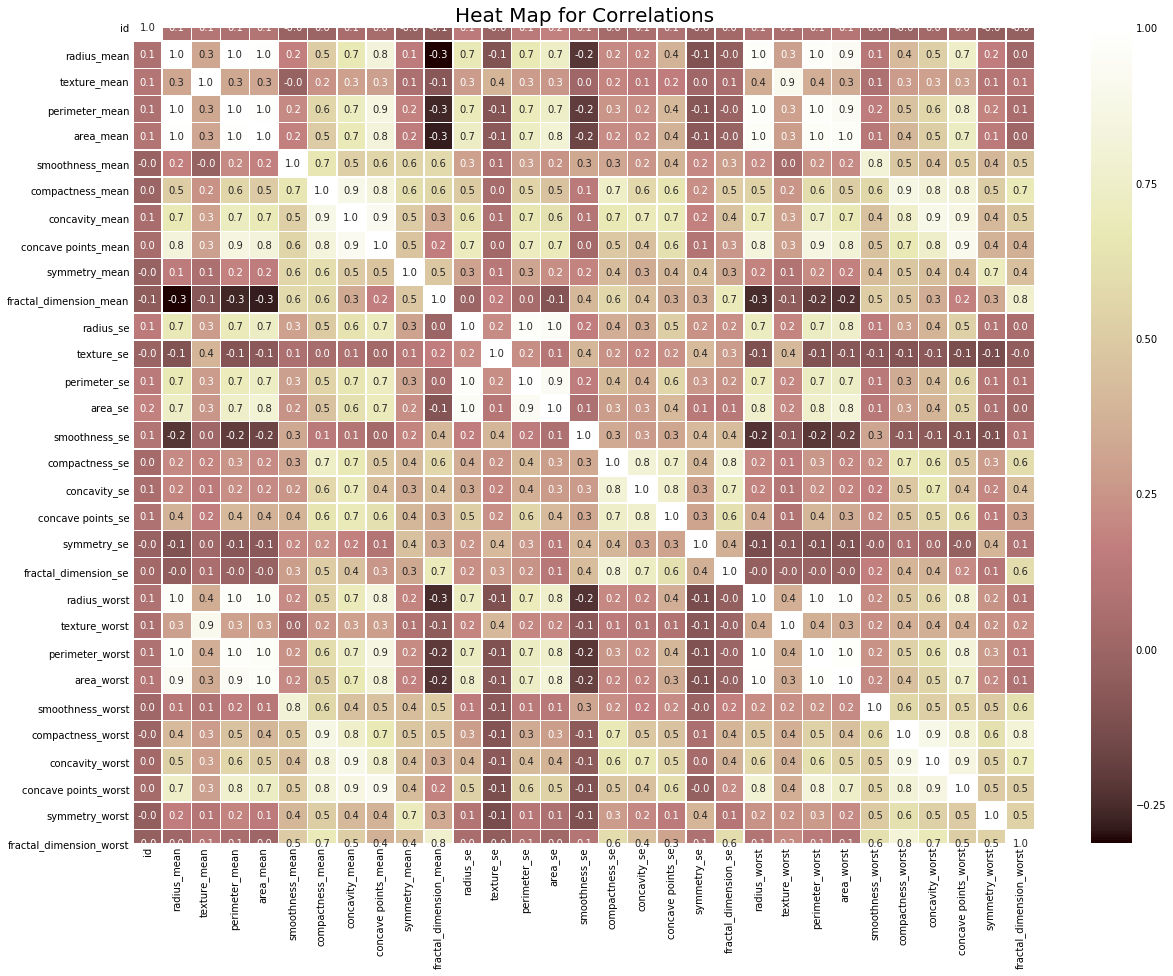

In [12]:
plt.rcParams['figure.figsize'] = (18, 15)

sns.heatmap(data.corr(), cmap = 'pink', annot = True, linewidths = 0.5, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

From the above correlation plot we can easily figure out that items which are very much related to each other and the items which are less related to each other

It tells us the degree of relativity amongst all the data items present on the dataset

For Example, fractal_dimension_mean and smoothness mean are highly related whereas texture_se and fractal-dimension_mean are very less related to each other

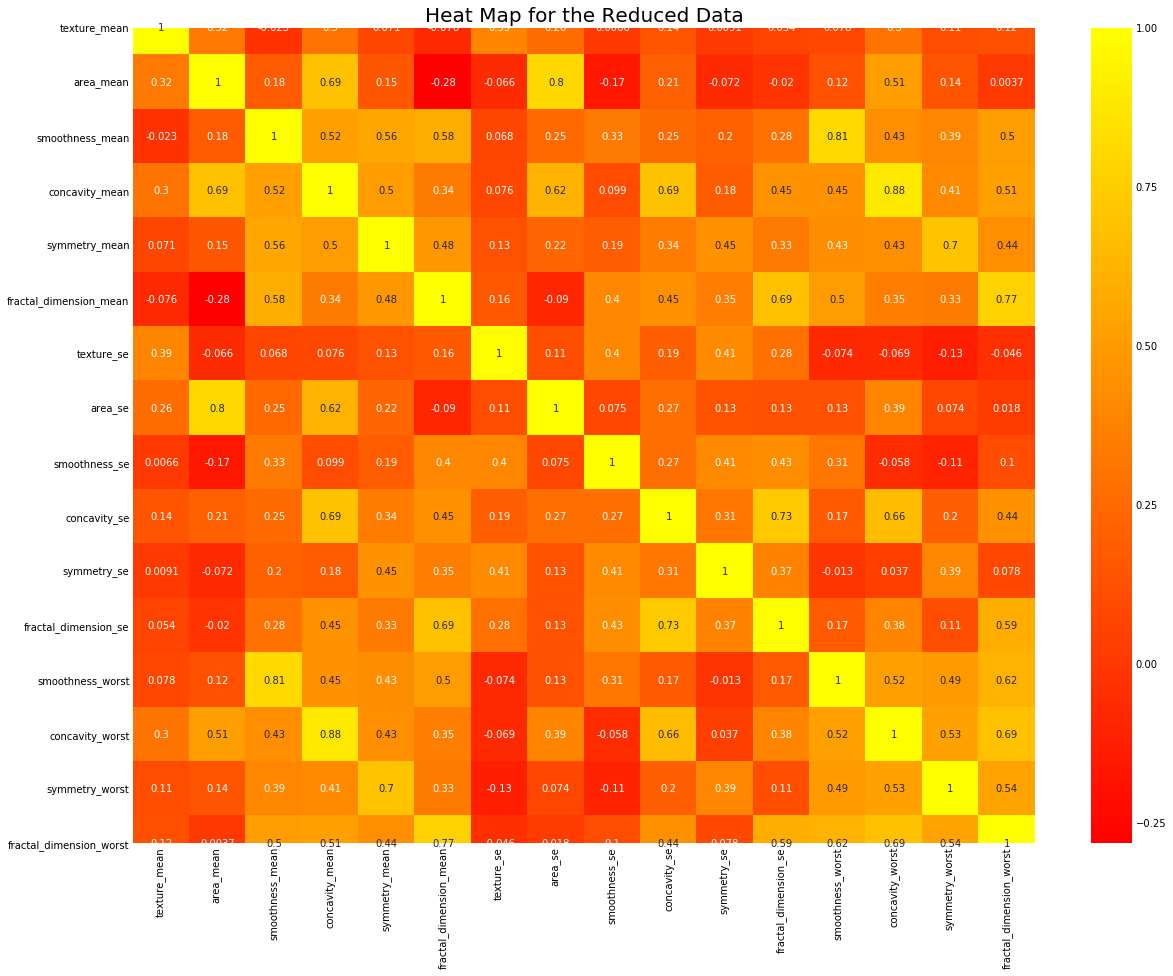

In [13]:
list_to_delete = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
                  'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
                  'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst','id']
x = x.drop(list_to_delete, axis = 1)

plt.rcParams['figure.figsize'] = (18, 15)
sns.heatmap(x.corr(), annot = True, cmap = 'autumn')
plt.title('Heat Map for the Reduced Data', fontsize = 20)
plt.show()


In [14]:
X = x 

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [15]:
y.shape

(569,)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [17]:
# Initialising the ANN
classifier = Sequential()


In [18]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=16))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=16, units=16, kernel_initializer="uniform")`

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`



In [19]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`



In [20]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`



In [21]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
X_train.shape

(512, 16)

In [23]:
#y_train=[[y_train]]

In [24]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/150
512/512 [==============================] - 0s 622us/step - loss: 0.6928 - accuracy: 0.5859
Epoch 2/150
512/512 [==============================] - 0s 47us/step - loss: 0.6918 - accuracy: 0.6348
Epoch 3/150
512/512 [==============================] - 0s 31us/step - loss: 0.6904 - accuracy: 0.6426
Epoch 4/150
512/512 [==============================] - 0s 47us/step - loss: 0.6881 - accuracy: 0.6875
Epoch 5/150
512/512 [==============================] - 0s 47us/step - loss: 0.6847 - accuracy: 0.7637
Epoch 6/150
512/512 [==============================] - 0s 63us/step - loss: 0.6799 - accuracy: 0.8496
Epoch 7/150
512/512 [==============================] - 0s 47us/step - loss: 0.6727 - accuracy: 0.8848
Epoch 8/150
512/512 [==============================] - 0s 31us/step - loss: 0.6633 - accuracy: 0.8926
Epoch 9/150
512/512 [==============================] - 0s 47us/step - loss: 0.6494 - accuracy: 0.9160
Epoch 10/150
512/512 [==============================] - 0s 47us/step - loss: 0.63

512/512 [==============================] - 0s 47us/step - loss: 0.0705 - accuracy: 0.9785
Epoch 81/150
512/512 [==============================] - 0s 47us/step - loss: 0.0636 - accuracy: 0.9785
Epoch 82/150
512/512 [==============================] - 0s 31us/step - loss: 0.0723 - accuracy: 0.9766
Epoch 83/150
512/512 [==============================] - 0s 31us/step - loss: 0.0748 - accuracy: 0.9727
Epoch 84/150
512/512 [==============================] - 0s 47us/step - loss: 0.0703 - accuracy: 0.9824
Epoch 85/150
512/512 [==============================] - 0s 47us/step - loss: 0.0645 - accuracy: 0.9805
Epoch 86/150
512/512 [==============================] - 0s 47us/step - loss: 0.0676 - accuracy: 0.9785
Epoch 87/150
512/512 [==============================] - 0s 31us/step - loss: 0.0712 - accuracy: 0.9766
Epoch 88/150
512/512 [==============================] - 0s 31us/step - loss: 0.0712 - accuracy: 0.9785
Epoch 89/150
512/512 [==============================] - 0s 47us/step - loss: 0.0708 - 

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))


Our accuracy is 98.24561403508771%


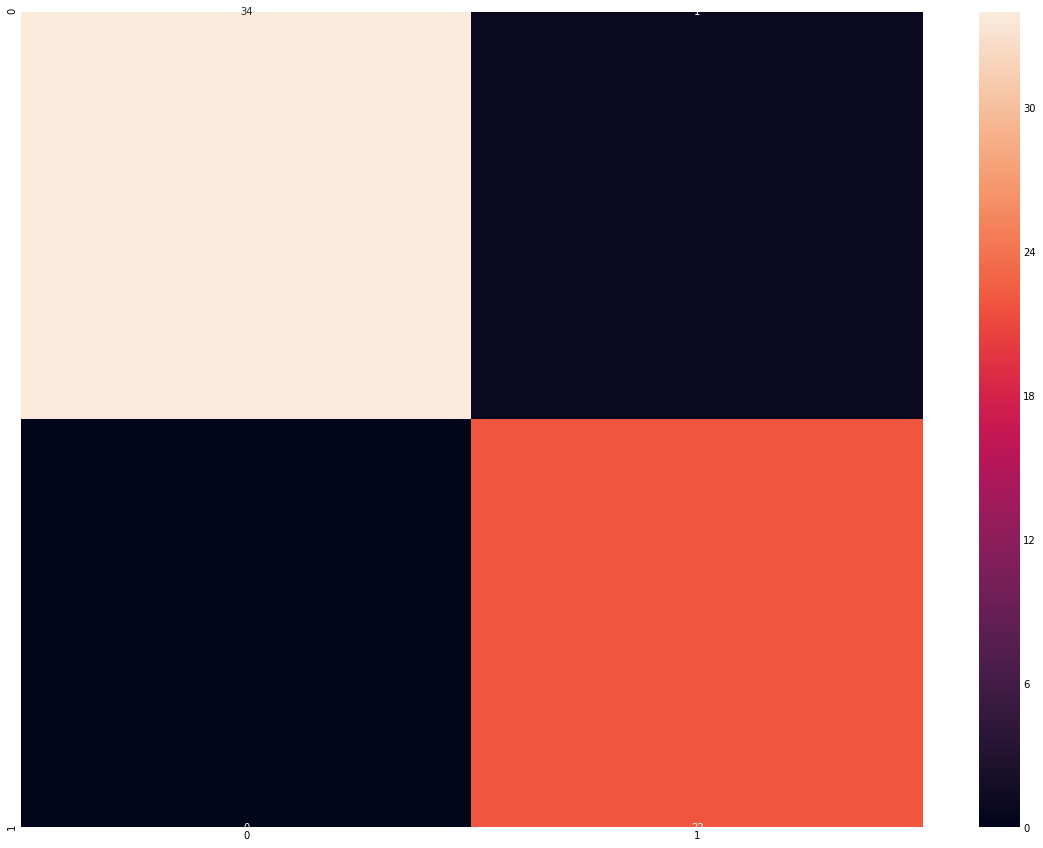

In [28]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
